In [1]:
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.metrics import r2_score

plot_parameters = {
    'jl': ('JL', 's', '#dc267f', 'dashed', 1.0, 1.0, 1.0),
    'cs': ('CS', 's', '#dc267f', 'solid', 1.0, 1.0, 1.0),
    'mh': ('MH', 's', '#fe6100', 'dashed', 1.0, 1.0, 1.0),
    'wmh': ('MH-weighted', 's', '#fe6100', 'solid', 1.0, 1.0, 1.0),
    'ts_2norm': ('TS-weighted', 's', '#ffb000', 'solid', 1.0, 1.0, 1.0),
    'ts_uniform': ('TS-uniform', 's', '#ffb000', 'dashed', 1.0, 1.0, 1.0),
    'ps_2norm': ('PS-weighted', 's', '#785ef0', 'solid', 1.0, 1.0, 1.0),
    'ps_uniform': ('PS-uniform', 's', '#785ef0', 'dashed', 1.0, 1.0, 1.0),
    'ts_corr': ('TS-weighted', 's', '#ffb000', 'solid', 1.0, 1.0, 1.0),
    'ps_corr': ('PS-weighted', 's', '#785ef0', 'solid', 1.0, 1.0, 1.0),
}

# Join Size Experiment Results in Table 2 of paper

In [2]:
joinSize_data = pickle.load(open("log/analysis_join_size_202312130144", "rb"))
sketch_methods = ['jl', 'cs', 'mh', 'wmh', 'ts_2norm', 'ps_2norm', 'ts_uniform', 'ps_uniform']

joinSize_results = defaultdict(list)
for log_key in joinSize_data:
    joinSize, corr, _ = joinSize_data[log_key]['true']
    if np.isnan(corr) or np.isinf(corr):
        continue
    for sketch_method in sketch_methods:
        try:
            joinSize_est, _, _, _, _ = joinSize_data[log_key][sketch_method]
        except:
            joinSize_est, _, _ = joinSize_data[log_key][sketch_method]
        joinSize_results[sketch_method].append((joinSize, joinSize_est))

In [3]:
diffs, r2_scores = [], []
for sketch_method in sketch_methods:
    res = joinSize_results[sketch_method]
    res_true = [i[0] for i in res]
    res_est = [i[1] for i in res]
    res_diff = np.average([abs(i[0]-i[1]) for i in res])
    r2 = r2_score(res_true, res_est)
    diffs.append(round(res_diff, 3))
    r2_scores.append(round(r2, 3))
data = {"Sketch Method":[plot_parameters[sketch_method][0] for sketch_method in sketch_methods], 
        "Average Difference":diffs, 
        "R2 Score":r2_scores}
df = pd.DataFrame(data)
sorted_df = df.sort_values(by="Average Difference", ascending=True)
sorted_df

,Sketch Method,Average Difference,R2 Score
4,TS-weighted,0.018,0.919
5,PS-weighted,0.023,0.839
6,TS-uniform,0.025,0.842
7,PS-uniform,0.027,0.826
2,MH,0.033,-0.033
3,MH-weighted,0.033,0.784
1,CS,0.044,0.729
0,JL,0.047,0.688


# Inner Product Experiment Results in Table 2 of paper

In [4]:
ip_data = pickle.load(open("log/analysis_ip_202312152255", "rb"))
sketch_methods = ['jl', 'cs', 'mh', 'wmh', 'ts_2norm', 'ps_2norm', 'ts_uniform', 'ps_uniform']
ip_results = defaultdict(list)
for log_key in ip_data:
    ip, corr, _ = ip_data[log_key]['true']
    if np.isnan(corr) or np.isinf(corr):
        continue
    for sketch_method in sketch_methods:
        try:
            ip_est, _, _, _, _ = ip_data[log_key][sketch_method]
        except:
            ip_est, _, _ = ip_data[log_key][sketch_method]
        ip_results[sketch_method].append((ip, ip_est))


In [5]:
diffs, r2_scores = [], []
for sketch_method in sketch_methods:
    res = ip_results[sketch_method]
    res_true = [i[0] for i in res]
    res_est = [i[1] for i in res]
    res_diff = np.average([abs(i[0]-i[1]) for i in res])
    r2 = r2_score(res_true, res_est)
    diffs.append(round(res_diff, 3))
    r2_scores.append(round(r2, 3))
data = {"Sketch Method":[plot_parameters[sketch_method][0] for sketch_method in sketch_methods], 
        "Average Difference":diffs, 
        "R2 Score":r2_scores}
df = pd.DataFrame(data)
sorted_df = df.sort_values(by="Average Difference", ascending=True)
sorted_df

,Sketch Method,Average Difference,R2 Score
4,TS-weighted,0.009,0.998
5,PS-weighted,0.010,0.998
1,CS,0.027,0.992
3,MH-weighted,0.032,0.985
0,JL,0.037,0.986
6,TS-uniform,0.096,0.217
7,PS-uniform,0.115,0.233
2,MH,0.119,-0.065


# Join Correlation Experiment Results in Table 2 of paper

In [6]:
corr_data = pickle.load(open("log/analysis_corr_202312152212", "rb"))
sketch_methods = ['jl', 'cs', 'mh', 'wmh', 'ts_corr', 'ps_corr', 'ts_uniform', 'ps_uniform']
corr_results = defaultdict(list)
for log_key in corr_data:
    ip, corr, _ = corr_data[log_key]['true']
    if np.isnan(corr) or np.isinf(corr):
        continue
    for sketch_method in sketch_methods:
        try:
            corr_est = corr_data[log_key][sketch_method]
        except:
            continue
        corr_results[sketch_method].append((corr, corr_est))

In [7]:
corr_diffs, r2_scores = [], []
for sketch_method in sketch_methods:
    res = corr_results[sketch_method]
    corr_true = [i[0] for i in res]
    corr_est = [i[1] for i in res]
    corr_diff = np.average([abs(i[0]-i[1]) for i in res])
    from sklearn.metrics import r2_score
    r2 = r2_score(corr_true, corr_est)
    corr_diffs.append(round(corr_diff, 3))
    r2_scores.append(round(r2, 3))
data = {"Sketch Method":[plot_parameters[sketch_method][0] for sketch_method in sketch_methods], "Average Difference":corr_diffs, "R2 Score":r2_scores}
df = pd.DataFrame(data)
sorted_df = df.sort_values(by="Average Difference", ascending=True)
sorted_df

,Sketch Method,Average Difference,R2 Score
5,PS-weighted,0.066,0.863
4,TS-weighted,0.080,0.772
7,PS-uniform,0.104,0.697
6,TS-uniform,0.107,0.704
2,MH,0.124,0.534
0,JL,0.203,0.347
1,CS,0.210,0.417
3,MH-weighted,0.298,-0.212


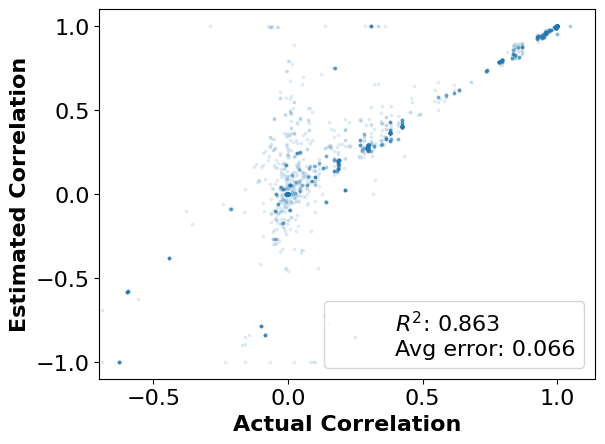

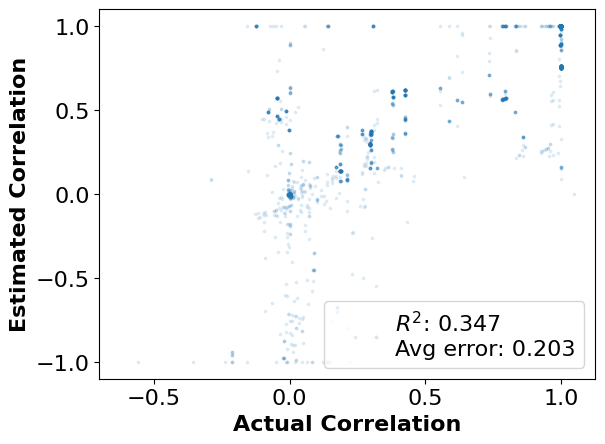

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

sketch_methods_plot = ['ps_corr', 'jl']

for sketch_method in sketch_methods_plot:
    res = corr_results[sketch_method]
    corr_t = [i[0] for i in res]
    corr_e = [i[1] for i in res]
    corr_diff = np.average([abs(i[0]-i[1]) for i in res])
    from sklearn.metrics import r2_score
    r2_score = r2_score(corr_t, corr_e)

    r2 = round(r2_score, 3)
    err = round(corr_diff, 3)
    if sketch_method == 'ts_corr':
        plt.scatter(corr_t, corr_e, s=3, alpha=0.1,
             label=f'$R^2$: {r2}\nAvg error: 0.080')
    else:
        plt.scatter(corr_t, corr_e, s=3, alpha=0.1,
             label=f'$R^2$: {r2}\nAvg error: {err}')
    plt.legend(loc='lower right')
    plt.xlabel('Actual Correlation', weight='bold')
    plt.ylabel('Estimated Correlation', weight='bold')
    plt.xlim(-0.7)
    # plt.title(plot_parameters[sketch_method][0])
    # plt.savefig('fig/wbf_corr_scatter_'+plot_parameters[sketch_method][0]+'.pdf', bbox_inches='tight')
    plt.show()
    